# Machine Learning Engineer Nanodegree

## Capstone Project

## Project: Using Supervised Learning to identify attrition in company

A company invest lot on employee to train them and make them ready for next generation business. Once you invest in skill enhancement of an employee you need to used it for benefit of business. Employee may be agitated even if they are being paid well as human have aspiration and if aspiration is fulfilled then they perform to their maximum capability. I was looking for dataset which has features that can be reason for employee to quit and Kaggle gave me one. Retaining an employee means retaining knowledge and they are the one who grooms the people working in one level down thus helping to increase and knowledge base for all.

## Exploring Data

In this section we will import data into dataframes and and display the first 5 records of file.

In [1]:
#Importing Libraries and display the records
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("HR_comma_sep.csv")

# Success - Display the first record
display(data.head(n=5))


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Implementation: Data Exploration

We will investigate total number of records in dataset. Number ofemployee left comapny. Number of employee stayed in company.
Percentage of employee left the company. Is there any null column. Also we will display the data types for all the column.

In [2]:
# Number of records in dataset
nbr_records = len(data)

# Number of records who left the company
nbr_of_emply_lft = len(data[data.left == 1])

# Number of records who are still working
nbr_of_emply_wrkng = len(data[data.left == 0])

# Percentage who left the company
prcnt_emply_lft = float(nbr_of_emply_lft* 100)/nbr_records

# Check null values in dataset
null_count = data.isnull().values.ravel().sum()

# Print the results
print ("Total number of records: {}" .format(nbr_records))

print ("Total number of employee who have moved on: {}" .format(nbr_of_emply_lft))
print ("Total number of employee who have stayed: {}" .format(nbr_of_emply_wrkng))
print ("Percent of employee who have moved on: {:.2f}%" .format(prcnt_emply_lft))
print ("Total number of null rows in Dataframe: {}" .format(null_count))
print ("\n Datatype as below")
print (data.dtypes)

Total number of records: 14999
Total number of employee who have moved on: 3571
Total number of employee who have stayed: 11428
Percent of employee who have moved on: 23.81%
Total number of null rows in Dataframe: 0

 Datatype as below
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


### Features and description

satisfaction_level : Level of Satisfaction.
last_evaluation :Time since Last performance Evaluation.
number_project :Number of Project completed while at work.
average_montly_hours : Average monthly hours at workplace.
time_spend_company : Number of years spent in the company.
Work_accident : Whether the employee had a workplace accident.
left : Whether employee left the workplace or not.
promotion_last_5years: Wehter employee was promoted in last 5 years.
sales : Department they work for.
Salary : Relative level of Salary(high).

### Data visulaization
In the below section we will understand the impact of each column on the other column. This will be seen through heatmap generated. Displays a bar graph with Sales/left and Salary/left.

Text(0.5,1,'Heatmap of Correlation Matrix')

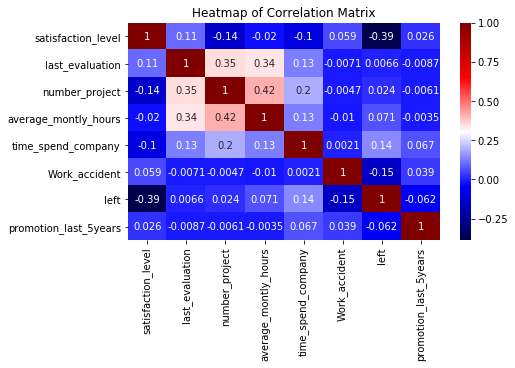

In [3]:
# Split data into features and target
import matplotlib.pyplot as plt

left_raw = data['left']
features_raw = data.drop('left', axis = 1)

# Visualize skewed continuous features of original data
import seaborn as sns

fig = plt.figure(figsize=(7,4))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')



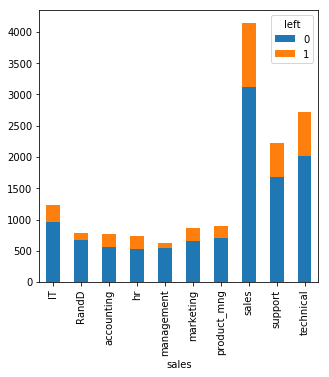

In [4]:
# Stack bar graph

stack_bar_graph = pd.crosstab(index=data["sales"], 
                          columns=data["left"])

stack_bar_graph.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

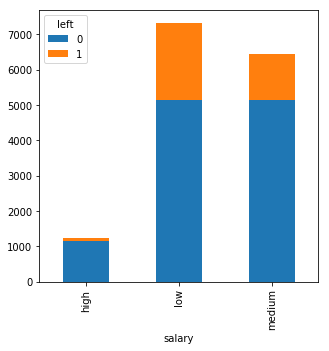

In [5]:
# Stack bar graph

stack_bar_graph = pd.crosstab(index=data["salary"], 
                          columns=data["left"])

stack_bar_graph.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

Text(0.5,1,'Last evaluation')

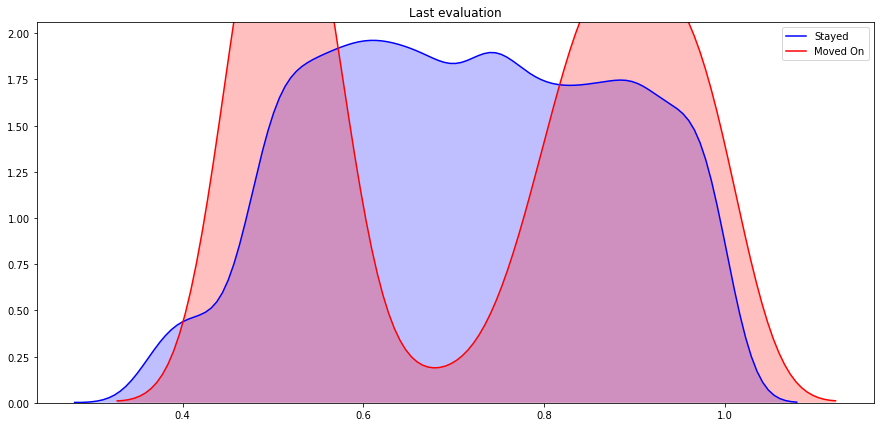

In [6]:
fig = plt.figure(figsize=(15,7),)
ax=sns.kdeplot(data.loc[(data['left'] == 0),'last_evaluation'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(data.loc[(data['left'] == 1),'last_evaluation'] , color='r',shade=True, label='Moved On')
plt.title('Last evaluation')

Text(0.5,1,'Satisfaction Level')

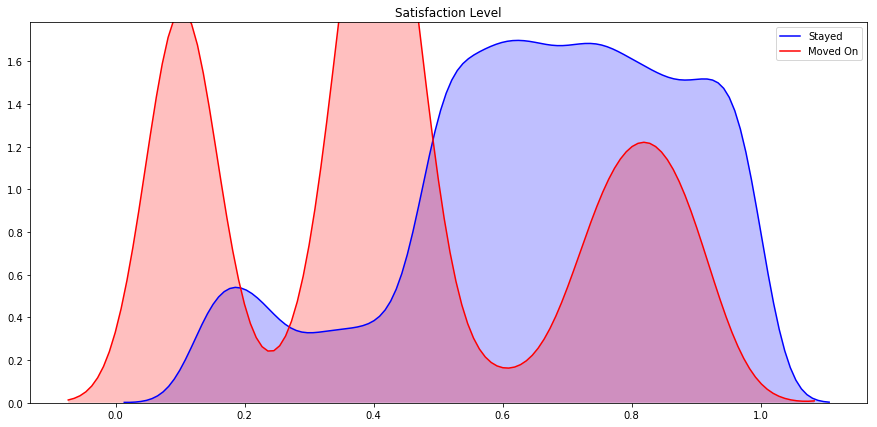

In [7]:
fig = plt.figure(figsize=(15,7),)
ax=sns.kdeplot(data.loc[(data['left'] == 0),'satisfaction_level'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(data.loc[(data['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='Moved On')
plt.title('Satisfaction Level')

Text(0.5,1,'Average Monthly Hours')

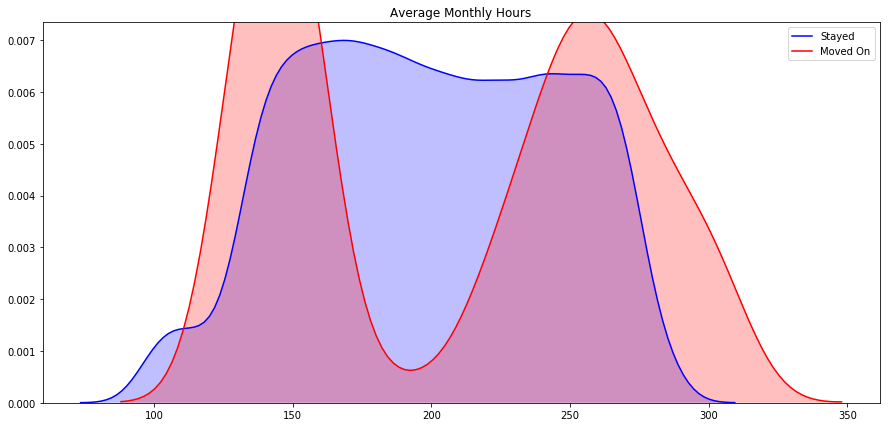

In [8]:
fig = plt.figure(figsize=(15,7),)
ax=sns.kdeplot(data.loc[(data['left'] == 0),'average_montly_hours'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(data.loc[(data['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='Moved On')
plt.title('Average Monthly Hours')

Text(0.5,1,'Promotion in last 5 years')

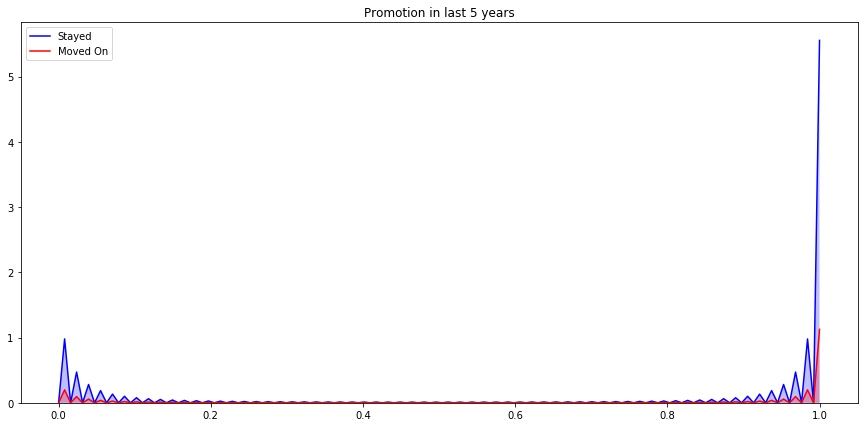

In [9]:
fig = plt.figure(figsize=(15,7),)
ax=sns.kdeplot(data.loc[(data['left'] == 0),'promotion_last_5years'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(data.loc[(data['left'] == 1),'promotion_last_5years'] , color='r',shade=True, label='Moved On')
plt.title('Promotion in last 5 years')

Text(0.5,1,'Number of Projects')

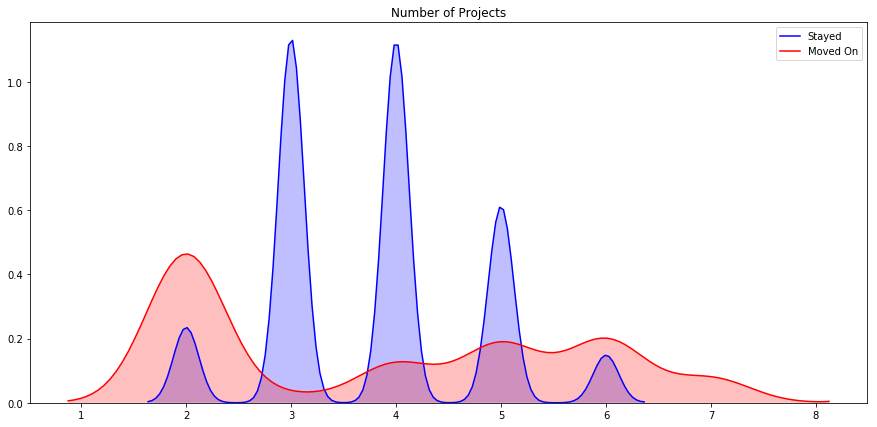

In [10]:
fig = plt.figure(figsize=(15,7),)
ax=sns.kdeplot(data.loc[(data['left'] == 0),'number_project'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(data.loc[(data['left'] == 1),'number_project'] , color='r',shade=True, label='Moved On')
plt.title('Number of Projects')

In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
features_log_transformed = pd.DataFrame(data = features_raw)
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','Work_accident','promotion_last_5years']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,sales,low


Text(0.5,1,'Heatmap of Correlation Matrix after Lograthmic Scaling')

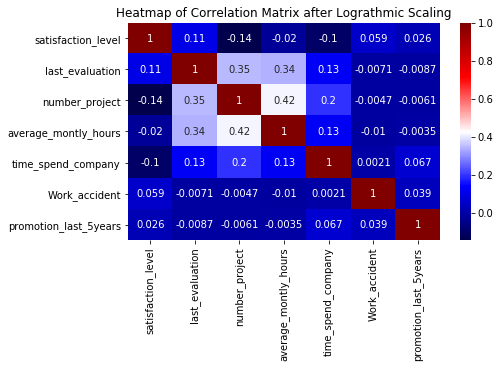

In [12]:
fig = plt.figure(figsize=(7,4))
corr = features_log_minmax_transform.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix after Lograthmic Scaling')

We will now do onehotencoding for below categorical data so as to convert the values of it into different column.

In [13]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_raw)

# Encode the 'left_raw' data to numerical values
left = pd.get_dummies(left_raw, drop_first = True)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print (encoded)



20 total features after one-hot encoding.


#### Shuffle and Split data

As all the categorical column has been converted to numerical column and all numerical column has been scaled. In the below section will will split data (both features and label) into training and test sets. 80% will be used for training and 20% will be used for test. 

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    left, 
                                                    test_size = 0.2, shuffle = True,
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 11999 samples.
Testing set has 3000 samples.


### Evaluation metrics

Classification model will be evaluated on F Beta score and Accuracy, precision and recall. We can use F-beta score as a metric that considers both precision and recall: $$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$ In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the F$_{0.5}$ score (or F-score for simplicity). 

Accuracy measures how often the classifier makes the correct prediction. It is the ratio of the number of correct predictions to the total number of predictions (the number of test data points). 

Precision tells us what proportion of messages we classified as left, actually left. It is a ratio of true positives(predicted value for person left and actually person left) to all positives(all the person left company irespective of true or false), in other words it is the ratio of <br> [True Positives/(True Positives + False Positives)] 

Recall(sensitivity) tells us what proportion of employee that left were classified by us as left. It is a ratio of true positives(employee that left, and employee actually left) to all the employee left, in other words it is the ratio of <br> [True Positives/(True Positives + False Negatives)]

In [16]:
def calculate_performance( y_test, y_predict, clf_nm):
    
    from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix
    
        
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    accuracy = accuracy_score(y_test, y_predict)
    fbeta = fbeta_score(y_test, y_predict, beta=0.5)
    
    print("Confusion matrix has {} True Negative " .format(tn))
    print("Confusion matrix has {} False Positive " .format(fp))
    print("Confusion matrix has {} False Negative " .format(fn))
    print("Confusion matrix has {} True Positive " .format(tp))
    print("--------%s----------" %(clf_nm))
    print("Model has {:.3f} accuracy"  .format(accuracy))
    print("Model has {:.3f} fbeta Score"  .format(fbeta))
    
    return

### Benchmark Model

Logistic regression is used as benchmark model. FBeta score of benchmark model is reference and other model will be judge to perform better if their fbeta score will be greater than Logistic regression model.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


BM_Classifier = LogisticRegression()
BM_Classifier.fit(X_train, y_train)
BM_Predict = BM_Classifier.predict(X_test)

nm='Logistic Regression'
calculate_performance( y_test, BM_Predict, nm)



Confusion matrix has 2134 True Negative 
Confusion matrix has 165 False Positive 
Confusion matrix has 474 False Negative 
Confusion matrix has 227 True Positive 
--------Logistic Regression----------
Model has 0.787 accuracy
Model has 0.500 fbeta Score


C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Various classifier and Confusion matrix, FBeta and accuracy 

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


EAB_Classifier = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=0)
EAB_Classifier.fit(X_train, y_train)

EAB_Predict = EAB_Classifier.predict(X_test)

nm='AdaBoost Classifier'
calculate_performance( y_test, EAB_Predict, nm)

C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix has 2247 True Negative 
Confusion matrix has 52 False Positive 
Confusion matrix has 59 False Negative 
Confusion matrix has 642 True Positive 
--------AdaBoost Classifier----------
Model has 0.963 accuracy
Model has 0.923 fbeta Score


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


GBC_Classifier = GradientBoostingClassifier(random_state=0)
GBC_Classifier.fit(X_train, y_train,)

GBC_Predict = GBC_Classifier.predict(X_test)

nm='Gradient Boosting Classifier'
calculate_performance( y_test, GBC_Predict, nm)

C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix has 2279 True Negative 
Confusion matrix has 20 False Positive 
Confusion matrix has 45 False Negative 
Confusion matrix has 656 True Positive 
--------Gradient Boosting Classifier----------
Model has 0.978 accuracy
Model has 0.963 fbeta Score


In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


SGD_Classifier = SGDClassifier(shuffle = True)
SGD_Classifier.fit(X_train, y_train)

SGD_Predict = SGD_Classifier.predict(X_test)

nm='Stochastic Gradient Descent Classifier'
calculate_performance( y_test, SGD_Predict, nm)

Confusion matrix has 1999 True Negative 
Confusion matrix has 300 False Positive 
Confusion matrix has 360 False Negative 
Confusion matrix has 341 True Positive 
--------Stochastic Gradient Descent Classifier----------
Model has 0.780 accuracy
Model has 0.522 fbeta Score


C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


SVC_Classifier = SVC()
SVC_Classifier.fit(X_train, y_train)

SVC_Predict = SVC_Classifier.predict(X_test)

nm='Support Vector Machine Classifier'
calculate_performance( y_test, SVC_Predict, nm)

C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix has 2245 True Negative 
Confusion matrix has 54 False Positive 
Confusion matrix has 347 False Negative 
Confusion matrix has 354 True Positive 
--------Support Vector Machine Classifier----------
Model has 0.866 accuracy
Model has 0.759 fbeta Score


In [22]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

# Initialize the classifier
clf = AdaBoostClassifier(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = { 'n_estimators': [75, 90, 125, 100], 'learning_rate' :[.75, .80, .90, .95] }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta =0.5)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters, scoring = scorer, cv = kfold)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
print(grid_fit.cv_results_)

best_clf = grid_fit.best_estimator_
print ("Best classifier is:", best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, EAB_Predict)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, EAB_Predict, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([ 0.45000417,  0.55937703,  0.70157561,  0.56113064,  0.46875355,
        0.49844613,  0.70712991,  0.58438194,  0.42813346,  0.52408719,
        0.69532325,  0.57034612,  0.42031522,  0.52656848,  0.69464328,
        0.57188125]), 'std_fit_time': array([ 0.01951717,  0.03109248,  0.01474533,  0.01301059,  0.04840889,
        0.00468792,  0.03649067,  0.04375129,  0.00765462,  0.04252584,
        0.01601115,  0.02983873,  0.0046916 ,  0.04943525,  0.00738467,
        0.02440725]), 'mean_score_time': array([ 0.0171859 ,  0.02031417,  0.0281265 ,  0.01902943,  0.01562526,
        0.0171875 ,  0.02812829,  0.02187407,  0.01562207,  0.02031775,
        0.028123  ,  0.0187516 ,  0.01562588,  0.02344077,  0.02343707,
        0.02187517]), 'std_score_time': array([  4.68803514e-03,   7.15944382e-03,   6.25081307e-03,
         6.16527014e-03,   7.73038924e-06,   4.68694372e-03,
         6.25153089e-03,   7.65449001e-03,   6.38325396e-06,
         7.16069559e-03,   6.249

C:\Users\Aliya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Unoptimized model
------
Accuracy score on testing data: 0.9630
F-score on testing data: 0.9232

Optimized Model
------
Final accuracy score on the testing data: 0.9657
Final F-score on the testing data: 0.9269


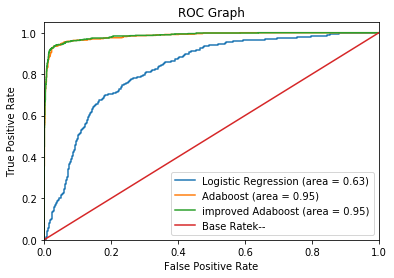

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

bm_roc_auc = roc_auc_score(y_test, BM_Classifier.predict(X_test))
eab_roc_auc = roc_auc_score(y_test, EAB_Classifier.predict(X_test))
i_eab_roc_auc = roc_auc_score(y_test, best_clf.predict(X_test))


fpr, tpr, thresholds = roc_curve(y_test, BM_Classifier.predict_proba(X_test)[:,1])
eab_fpr, eab_tpr, eab_thresholds = roc_curve(y_test, EAB_Classifier.predict_proba(X_test)[:,1])
ieab_fpr, ieab_tpr, ieab_thresholds = roc_curve(y_test, best_clf.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % bm_roc_auc)

# Plot Adaboost ROC
plt.plot(eab_fpr, eab_tpr, label='Adaboost (area = %0.2f)' % eab_roc_auc)

# Plot Improved Adaboost Tree ROC
plt.plot(ieab_fpr, ieab_tpr, label='improved Adaboost (area = %0.2f)' % i_eab_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()
